---

# Train, Test and Evaluate a Regression Model 

---

#### Don't forget to fill out your notebook and send it at the end of the session to Nourhene.Ben-Rabah@univ-paris1.fr


# Dataset 
In this notebook, we will use the **steel industry energy consumption dataset**. This is one of the most recently published datasets that integrates energy consumption data collected using several IoT devices from a small smart steel industry in South Korea. The steel industry produces several types of coils, steel plates and iron plates. 



# Define task 
The task is to make prediction about the energy consumption of the steel industry from a set of metrics. The Usage_kWh is the target variable that ML models must predict.

# Information About Dataset


In [1]:
import pandas as pnd
df_oasis = pnd.read_csv("oasis_cleaned.csv")
df_oasis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     570 non-null    float64
 1   Educ    570 non-null    float64
 2   SES     570 non-null    float64
 3   MMSE    570 non-null    float64
 4   eTIV    570 non-null    float64
 5   nWBV    570 non-null    float64
 6   ASF     570 non-null    float64
 7   F       570 non-null    float64
 8   M       570 non-null    float64
 9   CDR     570 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 44.7 KB


In [16]:
df_oasis.head()

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,F,M,CDR
0,0.630769,0.045455,0.50,0.961538,0.265033,0.502538,0.604782,1.0,0.0,0
1,0.338462,0.136364,0.00,0.961538,0.045657,0.842640,0.921238,1.0,0.0,0
2,0.615385,0.136364,0.50,0.884615,0.387528,0.324873,0.465541,1.0,0.0,1
3,0.630769,0.181818,0.25,1.000000,0.590200,0.228426,0.277075,0.0,1.0,0
4,0.292308,0.090909,0.25,1.000000,0.239421,0.928934,0.637131,1.0,0.0,0


# Data transformation 
 Define the DataFrame index using the date column 

The data to be analyzed consists of two types: numerical data and categorical data (object type). Most ML models require that the categorical data must be in a numeric format to work properly. Therefore, it is important to convert data of type object  into *numerical values*, which is called encoding.

You have already seen an encoder of type *One Hot* and now you will see another one of type *Label Encoder* 
We have 3 columns to encode: WeekStatus, Day_of_week and Load_Type    

# Split Data to Train and Test 

#  Data scaling/normalization 
The final step (optional) before the data is passed to ML algorithms is to scale the data. You can see that some columns of the dataset contain small values, while the others contain very large values. It is better to convert all values to
a uniform scale. 

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df_oasis.drop('CDR', axis=1)
y=df_oasis["CDR"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)

          Age      Educ   SES      MMSE      eTIV      nWBV       ASF    F  \
68   0.815385  0.136364  0.50  1.000000  0.208241  0.568528  0.676512  1.0   
182  0.676923  0.045455  0.75  0.692308  0.271715  0.467005  0.596343  1.0   
63   0.723077  0.045455  0.75  0.923077  0.649220  0.314721  0.229255  0.0   
158  0.676923  0.136364  0.00  0.961538  0.792873  0.467005  0.125176  0.0   
60   0.723077  0.045455  0.75  0.615385  0.432071  0.106599  0.420534  0.0   
..        ...       ...   ...       ...       ...       ...       ...  ...   
71   0.738462  0.045455  0.50  0.923077  0.433185  0.218274  0.419128  1.0   
106  0.630769  0.181818  0.25  1.000000  0.327394  0.558376  0.531646  1.0   
270  0.876923  0.500000  0.50  0.653846  0.223831  0.177665  0.655415  0.0   
435  0.738462  0.454545  0.75  0.923077  0.717149  0.131980  0.178622  0.0   
102  0.676923  0.000000  0.75  0.615385  0.300668  0.289340  0.561181  1.0   

       M  
68   0.0  
182  0.0  
63   1.0  
158  1.0  
60   1.0

# Create and train models
**g) Start by creating, training and evaluating the algorithms seen in the course: LinearRegression and Decision Tree Regressor**

Use the *Mean Absolute Error (MAE)*, *training time* and *prediction time* to evaluate the models performance

*MAE* is the mean of the absolute values of the individual prediction errors on all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance. The closer the measure is to zero, the better the performance, while the higher the measure, the worse the performance.

Let's visualize the linear regression model 

**h) Let's visualize the Decision Tree model** 

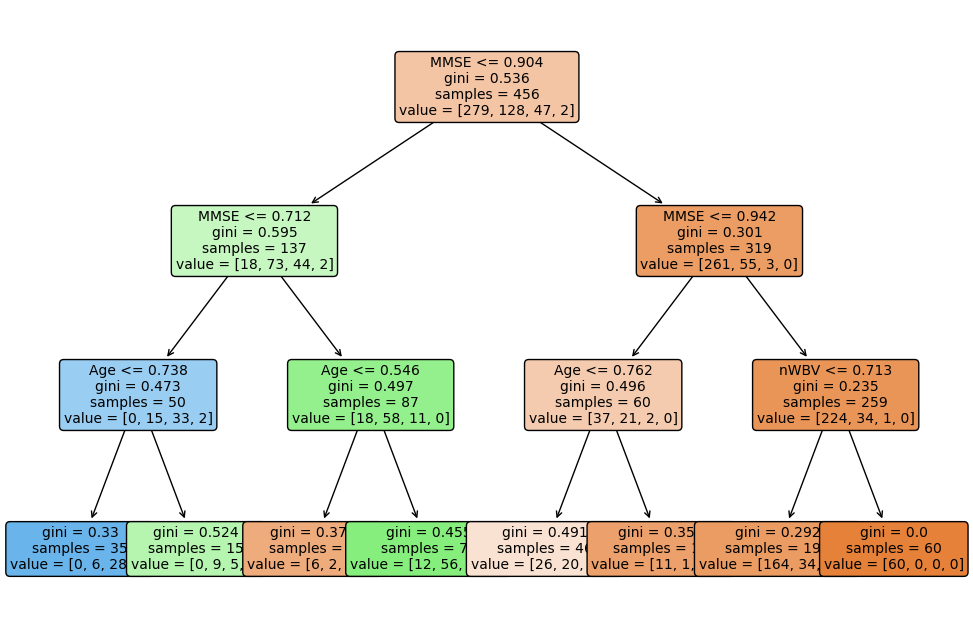

In [18]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt

# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

# visualise the Deicison Tree model
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=df_oasis.columns[:-1], rounded=True, fontsize=10)
plt.show()


**j) You will now test other regression algorithms such as KNN, Random Forest and SVR**

**k) Compare the performance of these models and determine the best model**

In [4]:
# j) KNN, Random Forest and SVR

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree, DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn_class = KNeighborsClassifier(n_neighbors = 3)
rf_class = RandomForestClassifier(n_estimators = 1000)
svc_class = SVC()
dct_class = DecisionTreeClassifier()

knn_class.fit(X_train, y_train)
rf_class.fit(X_train, y_train)
svc_class.fit(X_train, y_train)
dct_class.fit(X_train, y_train)

knn_pred = knn_class.predict(X_test)
rf_pred = rf_class.predict(X_test)
svc_pred = svc_class.predict(X_test)
dct_pred = dct_class.predict(X_test)


{3}
507    0
70     1
131    1
400    0
541    1
Name: CDR, dtype: int64


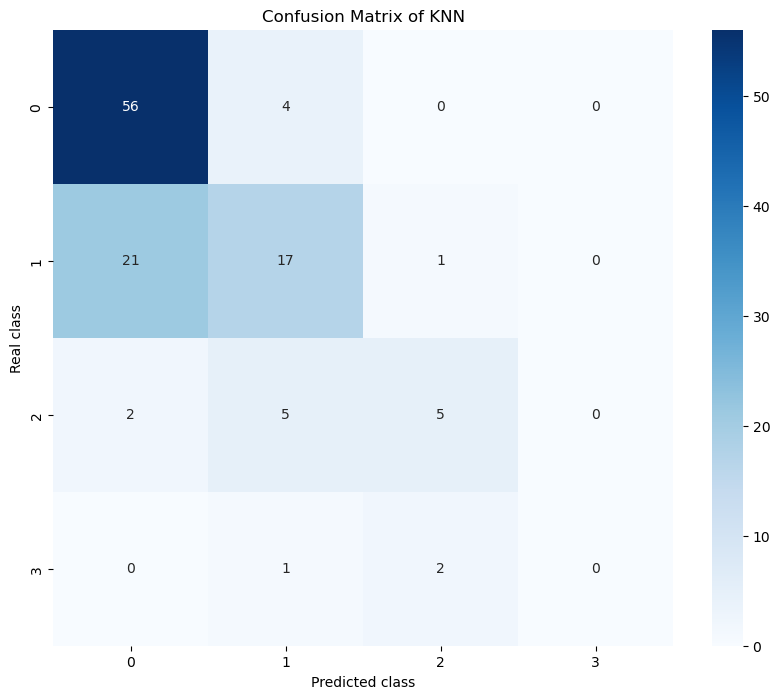

Accuracy: 0.6842105263157895
Precision: 0.6542736940804895
Recall: 0.6842105263157895
F1 score: 0.6529494108062832


In [94]:
# Calculate the confusion matrix 
conf_matrix = confusion_matrix(y_test, knn_pred)
print(set(y_test) - set(knn_pred))

print(y_test.head())

# Display the confusion matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.title('Confusion Matrix of KNN')
plt.show()

# Calculation of accuracy
accuracy = accuracy_score(y_test, knn_pred)

# Calculation of precision
precision = precision_score(y_test, knn_pred, average='weighted', zero_division=0)

# Recall calculation
recall = recall_score(y_test, knn_pred, average='weighted', zero_division=0)

# F1 score calculation
f1 = f1_score(y_test, knn_pred, average='weighted', zero_division=0)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

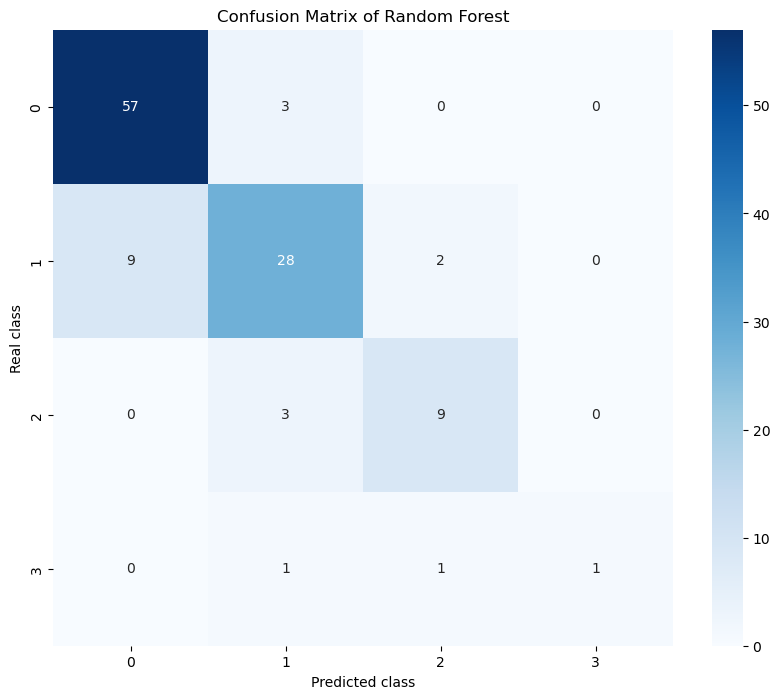

Accuracy: 0.8333333333333334
Precision: 0.8534090909090909
Recall: 0.6878205128205128
F1 score: 0.7278796653796654


In [95]:
# Calculate the confusion matrix 
conf_matrix = confusion_matrix(y_test, rf_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# Calculation of accuracy
accuracy = accuracy_score(y_test, rf_pred)

# Calculation of precision
precision = precision_score(y_test, rf_pred, average='macro', zero_division=0)

# Recall calculation
recall = recall_score(y_test, rf_pred, average='macro', zero_division=0)

# F1 score calculation
f1 = f1_score(y_test, rf_pred, average='macro', zero_division=0)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

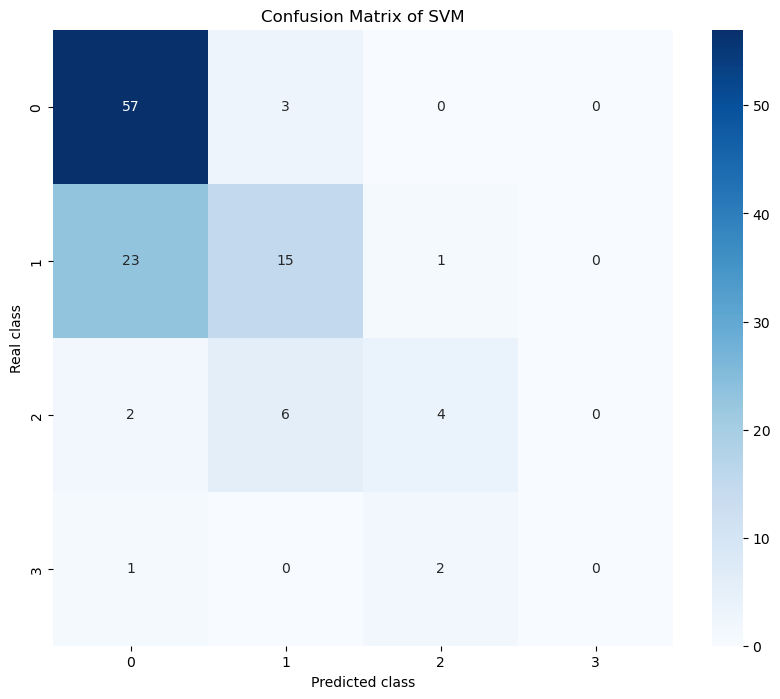

Accuracy: 0.6666666666666666
Precision: 0.4707938898450947
Recall: 0.41698717948717945
F1 score: 0.42361147624305523


In [96]:
# Calculate the confusion matrix 
conf_matrix = confusion_matrix(y_test, svc_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.title('Confusion Matrix of SVM')
plt.show()

# Calculation of accuracy
accuracy = accuracy_score(y_test, svc_pred)

# Calculation of precision
precision = precision_score(y_test, svc_pred, average='macro', zero_division=0)

# Recall calculation
recall = recall_score(y_test, svc_pred, average='macro', zero_division=0)

# F1 score calculation
f1 = f1_score(y_test, svc_pred, average='macro', zero_division=0)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

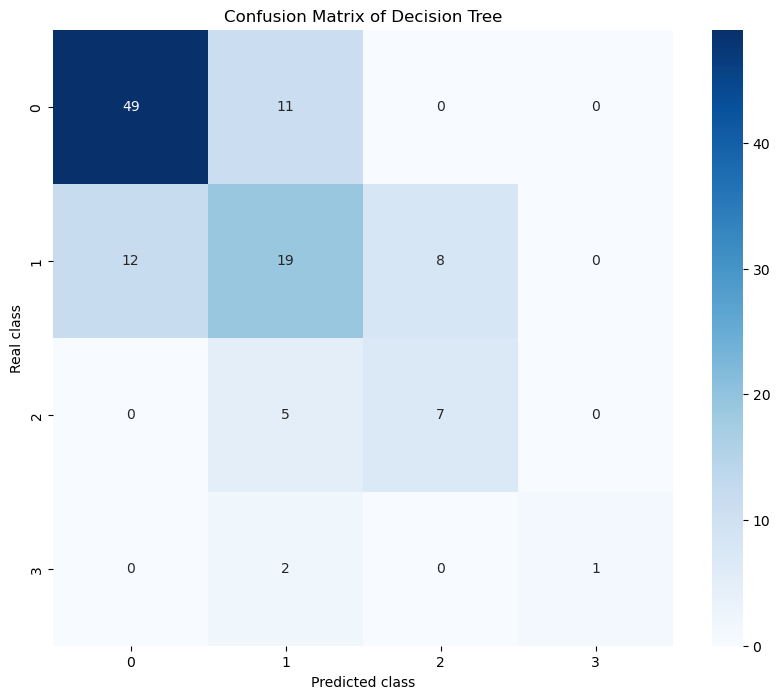

Accuracy: 0.6666666666666666
Precision: 0.6958647171761926
Recall: 0.5551282051282052
F1 score: 0.5821089684726048


In [97]:
# Calculate the confusion matrix 
conf_matrix = confusion_matrix(y_test, dct_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

# Calculation of accuracy
accuracy = accuracy_score(y_test, dct_pred)

# Calculation of precision
precision = precision_score(y_test, dct_pred, average='macro', zero_division=0)

# Recall calculation
recall = recall_score(y_test, dct_pred, average='macro', zero_division=0)

# F1 score calculation
f1 = f1_score(y_test, dct_pred, average='macro', zero_division=0)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

In [98]:
# k) Best model

"""
It seems like the best model would me Random Forest Regressor MAE ebcause it has the lowest value.
"""

'\nIt seems like the best model would me Random Forest Regressor MAE ebcause it has the lowest value.\n'

# Exercice 
Using the Diamonds dataset, train a regression algorithm of your choice, which predicts the price of the diamond.
Perform all the preprocessing steps.

# Iterate!
At this point, you can go back to the previous steps to try to make improvements to the model (consider changing the hyperparameters of the models).


In [7]:
# Ensemble Method
# We will be using the Ensemble method to combine multiple base model and try to produce an "optimal" predictive model
# 1. The first one uses Random Forest, Gradient Boosting,KNeighbors and SVC. We observed that the SVC does not have the best results so we
# tried it without in part 2.

Accuracy: 0.7719298245614035
Precision: 0.7700275711227147
Recall: 0.7719298245614035
F1 score: 0.764143329416195


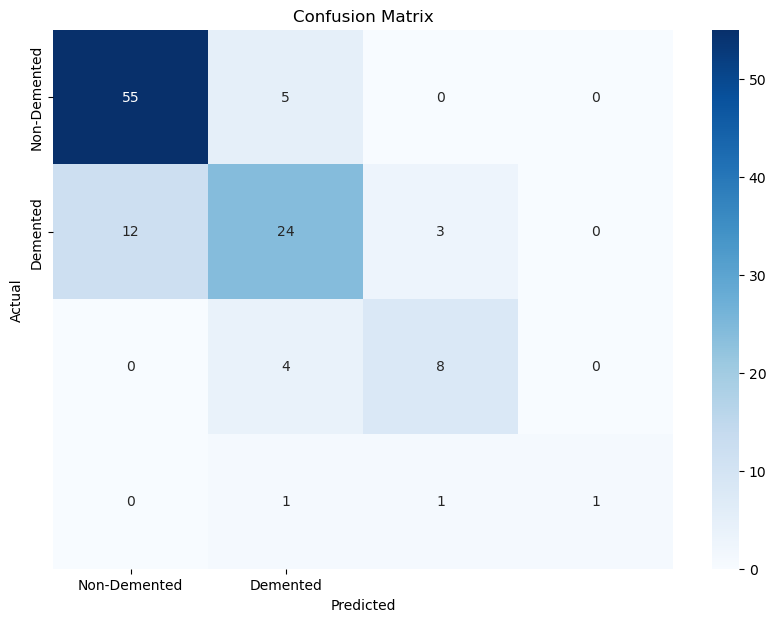

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
df_oasis = pd.read_csv("oasis_cleaned.csv")

X = df_oasis.drop('CDR', axis=1)
y = df_oasis["CDR"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifiers
rf_class = RandomForestClassifier(n_estimators=1000, random_state=42)
gb_class = GradientBoostingClassifier(n_estimators=100, random_state=42)
knn_class = KNeighborsClassifier(n_neighbors=5)
svc_class = SVC(probability=True, random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_class),
    ('gb', gb_class),
    ('knn', knn_class),
    ('svc', svc_class)
], voting='soft')

ensemble_model.fit(X_train, y_train)

ensemble_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, ensemble_pred)
precision = precision_score(y_test, ensemble_pred, average='macro')
recall = recall_score(y_test, ensemble_pred, average='macro')
f1 = f1_score(y_test, ensemble_pred, average='macro')
conf_matrix = confusion_matrix(y_test, ensemble_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Create the plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Demented', 'Demented'], yticklabels=['Non-Demented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 2. Because SVC was not showing the best results independently, we tried the Ensemble method without it below.

Accuracy: 0.7894736842105263
Precision: 0.8026556776556777
Recall: 0.6391025641025642
F1 score: 0.6747435897435897


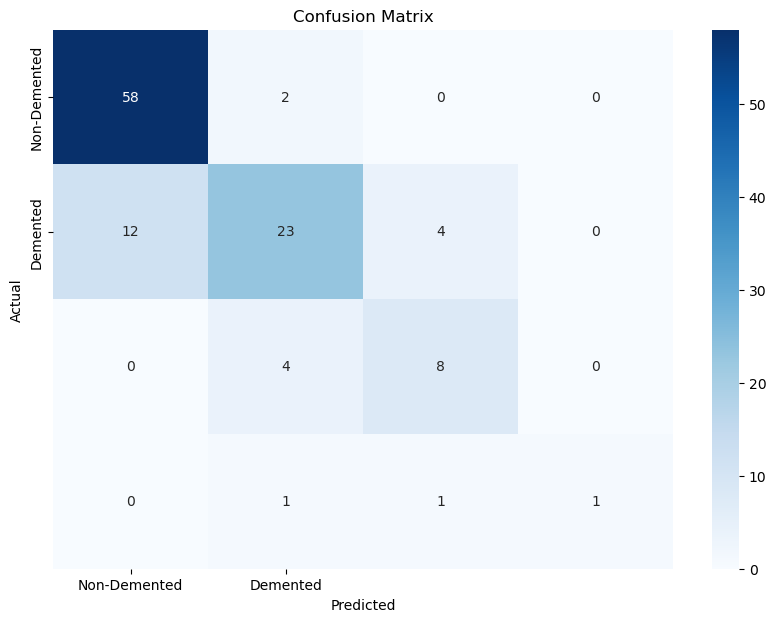

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
df_oasis = pd.read_csv("oasis_cleaned.csv")

X = df_oasis.drop('CDR', axis=1)
y = df_oasis["CDR"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifiers
rf_class = RandomForestClassifier(n_estimators=1000, random_state=42)
gb_class = GradientBoostingClassifier(n_estimators=100, random_state=42)
knn_class = KNeighborsClassifier(n_neighbors=5)

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_class),
    ('gb', gb_class),
    ('knn', knn_class)
], voting='soft')

ensemble_model.fit(X_train, y_train)

ensemble_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, ensemble_pred)
precision = precision_score(y_test, ensemble_pred, average='macro')
recall = recall_score(y_test, ensemble_pred, average='macro')
f1 = f1_score(y_test, ensemble_pred, average='macro')
conf_matrix = confusion_matrix(y_test, ensemble_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Create the plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Demented', 'Demented'], yticklabels=['Non-Demented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# As expected, without SVC, the Accuracy and Precision results of the Ensemble Method are better (>1% for the Accuracy and >3% for the Precision)
#Therefore, depending on the specific needs (high recall or high precision), we should choose the method that best suits our use case.